In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset_path = r"https://drive.google.com/uc?export=download&id=1BiGZSedP4BIIuTbVTBodOhVgFImaz08c"
df = pd.read_csv(dataset_path)


In [3]:
df.shape


(1460, 81)

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
drop_columns = df.columns[df.isnull().sum()/len(df) > .20]
df2_drop_clm = df.drop(columns = drop_columns)
df2_drop_clm.shape

(1460, 76)

In [7]:
df3_num = df2_drop_clm.select_dtypes(include = ['int64','float64'])
df3_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
 df3_num[df3_num.isnull().any(axis=1)]  #to get the rows where null values are present

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
12,13,20,NaN,12968,5,6,1962,1962,0.0,737,...,140,0,0,0,176,0,0,9,2008,144000
14,15,20,NaN,10920,6,5,1960,1960,212.0,733,...,0,213,176,0,0,0,0,5,2008,157000
16,17,20,NaN,11241,6,7,1970,1970,180.0,578,...,0,0,0,0,0,0,700,3,2010,149000
24,25,20,NaN,8246,5,8,1968,2001,0.0,188,...,406,90,0,0,0,0,0,5,2010,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1444,30,NaN,8854,6,6,1916,1950,0.0,0,...,0,98,0,0,40,0,0,5,2009,121000
1446,1447,20,NaN,26142,5,7,1962,1962,189.0,593,...,261,39,0,0,0,0,0,4,2010,157900
1449,1450,180,21.0,1533,5,7,1970,1970,0.0,553,...,0,0,0,0,0,0,0,8,2006,92000
1450,1451,90,60.0,9000,5,5,1974,1974,0.0,0,...,32,45,0,0,0,0,0,9,2009,136000


In [10]:
df3_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [11]:
missing_num_var = [var for var in df3_num.columns if df3_num[var].isnull().sum()>0]
missing_num_var  #gives columns' name where null entries are more than 0

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

C:\Users\SHASHANK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SHASHANK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SHASHANK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

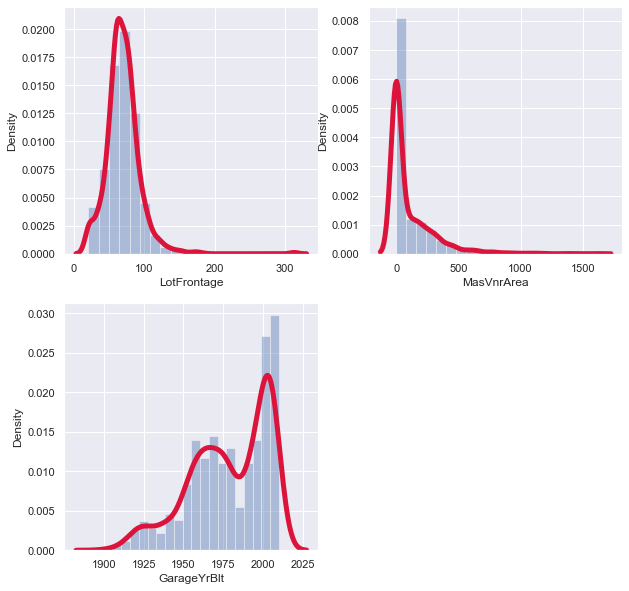

In [12]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_num[var],bins=20, kde_kws = {'linewidth':5,'color':'#DC143C'}) 

In [13]:
#where to use median mean and mode
#is the data is bell shaped like top leftmost then use mean or medain or mode
#if the data is skewed then use median

In [15]:
df4_num_mean = df3_num.fillna(df3_num.mean()) #fillna() functions fill the na values with mean of all variables
df4_num_mean.isnull().sum().sum()

0

C:\Users\SHASHANK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SHASHANK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SHASHANK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

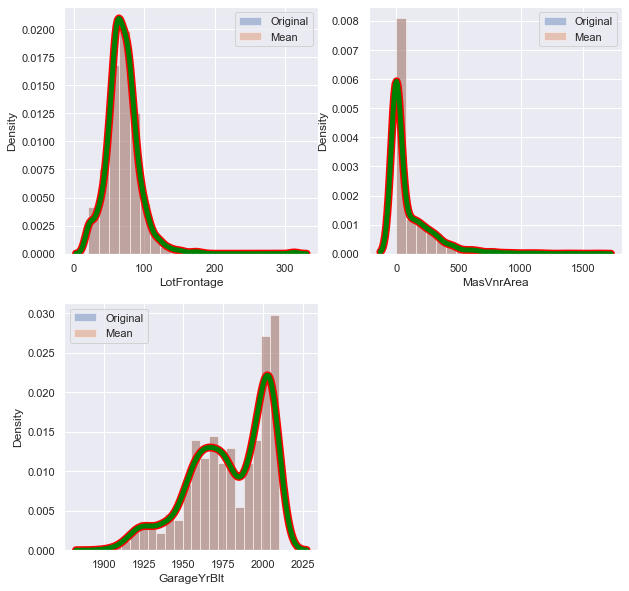

In [16]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df3_num[var],bins=20, kde_kws = {'linewidth':8,'color':'red'}, label ="Original",)
    sns.distplot(df3_num[var],bins=20, kde_kws = {'linewidth':5,'color':'green'}, label = "Mean",)
    plt.legend()

C:\Users\SHASHANK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SHASHANK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'df5_num_median' is not defined

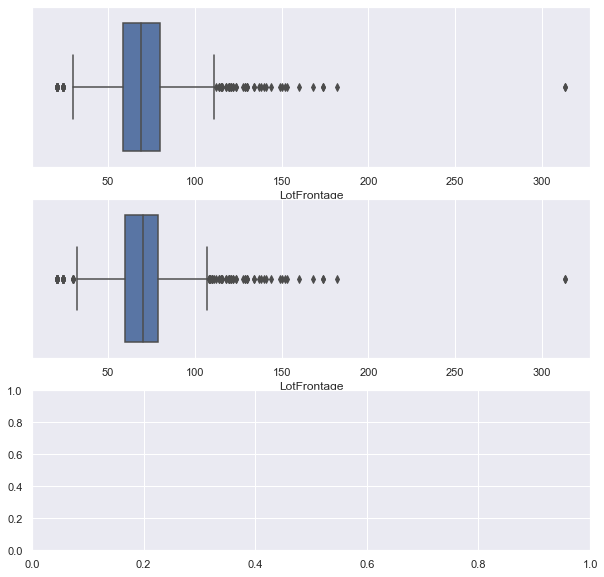

In [17]:
for i, var in enumerate(missing_num_var):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    plt.subplot(3,1,2)
    sns.boxplot(df4_num_mean[var])
    plt.subplot(3,1,3)
    sns.boxplot(df5_num_median[var])

In [18]:
#leftmost vertical line gives min and blackdots gives us information about outliers 
#in short to increase accuracy of the prediction we have to reduce these outliers

In [20]:
df_concat = pd.concat([df3_num[missing_num_var],df4_num_mean[missing_num_var]],axis=1)
df_concat[df_concat.isnull().any(axis=1)]

,LotFrontage,MasVnrArea,GarageYrBlt,LotFrontage,MasVnrArea,GarageYrBlt
7,NaN,240.0,1973.0,70.049958,240.0,1973.000000
12,NaN,0.0,1962.0,70.049958,0.0,1962.000000
14,NaN,212.0,1960.0,70.049958,212.0,1960.000000
16,NaN,180.0,1970.0,70.049958,180.0,1970.000000
24,NaN,0.0,1968.0,70.049958,0.0,1968.000000
...,...,...,...,...,...,...
1443,NaN,0.0,1916.0,70.049958,0.0,1916.000000
1446,NaN,189.0,1962.0,70.049958,189.0,1962.000000
1449,21.0,0.0,NaN,21.000000,0.0,1978.506164
1450,60.0,0.0,NaN,60.000000,0.0,1978.506164
